
# MICRO CREDIT CARD

### Problem statement:

A Microfinance Institution (MFI) is an organization that offers financial services to low income populations. MFS becomes very useful when targeting especially the unbanked poor families living in
remote areas with not much sources of income. The Microfinance services (MFS) provided by MFI are Group Loans, Agricultural Loans, Individual Business Loans and so on. Many microfinance institutions
(MFI), experts and donors are supporting the idea of using mobile financial services (MFS) which they feel are more convenient and efficient, and cost saving, than the traditional high-touch model used
since long for the purpose of delivering microfinance services.

Though, the MFI industry is primarily focusing on low income families and are very useful in such areas, the implementation of MFS has been uneven with both significant challenges and successes. Today, microfinance is widely accepted as a poverty-reduction tool, representing $70 billion in outstanding loans and a global outreach of 200 million clients. We are working with one such client that is in Telecom Industry. They are a fixed wireless telecommunications network provider. They have launched various products and have developed their business and organization based on the budget operator model, offering better products at Lower Prices to all value- conscious customers through a strategy of disruptive innovation that focuses on the subscriber.




### Problem understanding:

Telecom Industries understand the importance of communication and how it affects a person’s life, thus, focusing on providing their services and products to low income families and poor customers
that can help them in the need of hour. They are collaborating with an MFI to provide micro-credit on mobile balances to be paid back in 5 days. 

The Consumer is believed to be defaulter if he deviates from the path of paying back the loaned amount within the time duration of 5 days. For the loan amount of 5 (in Indonesian Rupiah), payback amount should be 6 (in Indonesian Rupiah), while, for the loan amount of 10 (in Indonesian Rupiah), the payback amount should be 12 (in Indonesian Rupiah). The sample data is provided to us from our client database. It is hereby given to you for this exercise. 

In order to improve the selection of customers for the credit, the client wants some predictions that could help them in further investment and improvement in selection of customers. We have to build a
model which can be used to predict in terms of a probability for each loan transaction, whether the customer will be paying back the loaned amount within 5 days of insurance of loan. In this case, Label
‘1’ indicates that the loan has been payed i.e. Non- defaulter, while, Label ‘0’ indicates that the loan has not been payed i.e. defaulter.

###  Importing necessary libaries

In [1]:


import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

from sklearn.metrics import accuracy_score,classification_report,confusion_matrix


### Loading the Dataset

In [2]:

dataset=pd.read_csv("Micro-credit-Data-file.csv")

dataset.head()

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22


In [3]:
# checking the total no of rows and columns our dataset contains
dataset.shape

(209593, 37)

In [4]:

dataset.columns

Index(['Unnamed: 0', 'label', 'msisdn', 'aon', 'daily_decr30', 'daily_decr90',
       'rental30', 'rental90', 'last_rech_date_ma', 'last_rech_date_da',
       'last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech30',
       'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30',
       'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90',
       'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_da_rech30',
       'fr_da_rech30', 'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30',
       'amnt_loans30', 'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90',
       'amnt_loans90', 'maxamnt_loans90', 'medianamnt_loans90', 'payback30',
       'payback90', 'pcircle', 'pdate'],
      dtype='object')

### Understanding the variables involved in our dataset

<b>'Unnamed: 0':</b> An index or identifier for each row in the dataset.

<b>'label':</b> The target variable or label, indicating non defaulter ie loan is being paid back in time (1) or not (0).

<b>'msisdn':</b> Mobile Subscriber Integrated Services Digital Network Number, a unique identifier for each mobile user.

<b>'aon':</b> Age on Network, the number of days the user has been using the mobile network.

<b>'daily_decr30':</b> Average daily amount spent from the main account in the last 30 days.

<b>'daily_decr90':</b> Average daily amount spent from the main account in the last 90 days.

<b>'rental30':</b> Average main account balance remaining after deducting the amount spent in the last 30 days.

<b>'rental90':</b> Average main account balance remaining after deducting the amount spent in the last 90 days.

<b>'last_rech_date_ma':</b> Number of days since the last mobile recharge (main account).

<b>'last_rech_date_da':</b> Number of days since the last mobile recharge (data account).

<b>'last_rech_amt_ma':</b> Amount of the last mobile recharge (main account).

<b>'cnt_ma_rech30':</b> Number of times the main account was recharged in the last 30 days.

<b>'fr_ma_rech30':</b> Frequency of main account recharges in the last 30 days.

<b>'sumamnt_ma_rech30':</b> Total amount of main account recharges in the last 30 days.

<b>'medianamnt_ma_rech30':</b> Median amount of main account recharges in the last 30 days.

<b>'medianmarechprebal30':</b> Median main account balance before recharge in the last 30 days.

<b>'cnt_ma_rech90':</b> Number of times the main account was recharged in the last 90 days.

<b>'fr_ma_rech90':</b> Frequency of main account recharges in the last 90 days.

<b>'sumamnt_ma_rech90':</b> Total amount of main account recharges in the last 90 days.

<b>'medianamnt_ma_rech90':</b> Median amount of main account recharges in the last 90 days.

<b>'medianmarechprebal90':</b> Median main account balance before recharge in the last 90 days.

<b>'cnt_da_rech30':</b> Number of times the data account was recharged in the last 30 days.

<b>'fr_da_rech30':</b> Frequency of data account recharges in the last 30 days.

<b>'cnt_da_rech90':</b> Number of times the data account was recharged in the last 90 days.

<b>'fr_da_rech90':</b> Frequency of data account recharges in the last 90 days.

<b>'cnt_loans30':</b> Number of loans taken by the user in the last 30 days.

<b>'amnt_loans30':</b> Total amount of loans taken by the user in the last 30 days.

<b>'maxamnt_loans30':</b> Maximum amount of a single loan taken in the last 30 days.

<b>'medianamnt_loans30':</b> Median amount of loans taken in the last 30 days.

<b>'cnt_loans90':</b> Number of loans taken by the user in the last 90 days.

<b>'amnt_loans90':</b> Total amount of loans taken by the user in the last 90 days.

<b>'maxamnt_loans90':</b> Maximum amount of a single loan taken in the last 90 days.

<b>'medianamnt_loans90':</b> Median amount of loans taken in the last 90 days.

<b>'payback30':</b> Average payback time in days of loans taken in the last 30 days.

<b>'payback90':</b> Average payback time in days of loans taken in the last 90 days.

<b>'pcircle':</b> Telecom circle area code.

<b>'pdate':</b> Date of the data entry in the dataset.

### Exploratory Data Analysis (EDA)

In [5]:
dataset.isnull().sum()

Unnamed: 0              0
label                   0
msisdn                  0
aon                     0
daily_decr30            0
daily_decr90            0
rental30                0
rental90                0
last_rech_date_ma       0
last_rech_date_da       0
last_rech_amt_ma        0
cnt_ma_rech30           0
fr_ma_rech30            0
sumamnt_ma_rech30       0
medianamnt_ma_rech30    0
medianmarechprebal30    0
cnt_ma_rech90           0
fr_ma_rech90            0
sumamnt_ma_rech90       0
medianamnt_ma_rech90    0
medianmarechprebal90    0
cnt_da_rech30           0
fr_da_rech30            0
cnt_da_rech90           0
fr_da_rech90            0
cnt_loans30             0
amnt_loans30            0
maxamnt_loans30         0
medianamnt_loans30      0
cnt_loans90             0
amnt_loans90            0
maxamnt_loans90         0
medianamnt_loans90      0
payback30               0
payback90               0
pcircle                 0
pdate                   0
dtype: int64

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 37 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Unnamed: 0            209593 non-null  int64  
 1   label                 209593 non-null  int64  
 2   msisdn                209593 non-null  object 
 3   aon                   209593 non-null  float64
 4   daily_decr30          209593 non-null  float64
 5   daily_decr90          209593 non-null  float64
 6   rental30              209593 non-null  float64
 7   rental90              209593 non-null  float64
 8   last_rech_date_ma     209593 non-null  float64
 9   last_rech_date_da     209593 non-null  float64
 10  last_rech_amt_ma      209593 non-null  int64  
 11  cnt_ma_rech30         209593 non-null  int64  
 12  fr_ma_rech30          209593 non-null  float64
 13  sumamnt_ma_rech30     209593 non-null  float64
 14  medianamnt_ma_rech30  209593 non-null  float64
 15  

### Correlation Matrix 

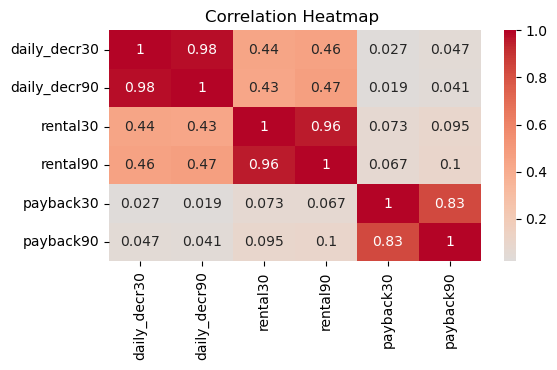

In [7]:
# checking features that might give rise to multicollinearity

check_features = ['daily_decr30', 'daily_decr90', 'rental30', 'rental90','payback30', 'payback90']

# Calculate the correlation matrix
correlation_matrix = dataset[check_features].corr()

# Plot the heatmap
plt.figure(figsize=(6, 3))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)

plt.title('Correlation Heatmap ')
plt.show()



#### 'daily_decr30', 'daily_decr90' have a correlation of about 0.98 

#### 'rental30', 'rental90' have a correlation of about 0.96

#### 'payback30', 'payback90' have a correlation of about 0.83

#### Since this values have a very strong correlation index between them ,so removing either one of them from the pair  to get more accurate and precise result and to avoid the issue of multicollinearity

In [8]:

dataset.drop(['daily_decr30','rental30','payback30','msisdn'],axis=1,inplace=True)

In [9]:
dataset.nunique().to_frame("No of unique values ")

,No of unique values
Unnamed: 0,209593
label,2
aon,4507
daily_decr90,158669
rental90,141033
last_rech_date_ma,1186
last_rech_date_da,1174
last_rech_amt_ma,70
cnt_ma_rech30,71
fr_ma_rech30,1083


In [10]:
# droping this columns as unnamed only represents the index and date is not significant factor

dataset.drop(['Unnamed: 0','pcircle','pdate'],axis=1,inplace=True)

In [11]:
dataset.shape

(209593, 30)

<b> Skewness tells us about the direction of outliers. WE  can see that our distribution is positively skewed, and most of the outliers are present on the right side of the distribution.
 
<b>The skewness does not tell us about the number of outliers. It only tells us the direction

<b>skewness = 0, the distribution is symmetrical.
skewness is +ve, the distribution is right-skewed (tail extends more to the right).
skewness is -ve, the distribution is left-skewed (tail extends more to the left).

In [12]:
dataset.skew()

label                   -2.270254
aon                     10.392949
daily_decr90             4.252565
rental90                 4.437681
last_rech_date_ma       14.790974
last_rech_date_da       14.814857
last_rech_amt_ma         3.781149
cnt_ma_rech30            3.283842
fr_ma_rech30            14.772833
sumamnt_ma_rech30        6.386787
medianamnt_ma_rech30     3.512324
medianmarechprebal30    14.779875
cnt_ma_rech90            3.425254
fr_ma_rech90             2.285423
sumamnt_ma_rech90        4.897950
medianamnt_ma_rech90     3.752706
medianmarechprebal90    44.880503
cnt_da_rech30           17.818364
fr_da_rech30            14.776430
cnt_da_rech90           27.267278
fr_da_rech90            28.988083
cnt_loans30              2.713421
amnt_loans30             2.975719
maxamnt_loans30         17.658052
medianamnt_loans30       4.551043
cnt_loans90             16.594408
amnt_loans90             3.150006
maxamnt_loans90          1.678304
medianamnt_loans90       4.895720
payback90     

In [13]:
dataset['label'].unique()

array([0, 1], dtype=int64)

In [14]:
dataset.describe()

,label,aon,daily_decr90,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,...,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback90
count,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,...,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000
mean,0.875177,8112.343445,6082.515068,3483.406534,3755.847800,3712.202921,2064.452797,3.978057,3737.355121,7704.501157,...,0.045712,2.758981,17.952021,274.658747,0.054029,18.520919,23.645398,6.703134,0.046077,4.321485
std,0.330519,75696.082531,10918.812767,5770.461279,53905.892230,53374.833430,2370.786034,4.256090,53643.625172,10139.621714,...,0.951386,2.554502,17.379741,4245.264648,0.218039,224.797423,26.469861,2.103864,0.200692,10.308108
min,0.000000,-48.000000,-93.012667,-24720.580000,-29.000000,-29.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,246.000000,42.692000,300.260000,1.000000,0.000000,770.000000,1.000000,0.000000,1540.000000,...,0.000000,1.000000,6.000000,6.000000,0.000000,1.000000,6.000000,6.000000,0.000000,0.000000
50%,1.000000,527.000000,1500.000000,1334.000000,3.000000,0.000000,1539.000000,3.000000,2.000000,4628.000000,...,0.000000,2.000000,12.000000,6.000000,0.000000,2.000000,12.000000,6.000000,0.000000,1.666667
75%,1.000000,982.000000,7802.790000,4201.790000,7.000000,0.000000,2309.000000,5.000000,6.000000,10010.000000,...,0.000000,4.000000,24.000000,6.000000,0.000000,5.000000,30.000000,6.000000,0.000000,4.500000
max,1.000000,999860.755168,320630.000000,200148.110000,998650.377733,999171.809410,55000.000000,203.000000,999606.368132,810096.000000,...,64.000000,50.000000,306.000000,99864.560864,3.000000,4997.517944,438.000000,12.000000,3.000000,171.500000


#### Outliers are often values that are significantly higher or lower than the majority of the data points.

#### Based on the descriptive statistics of the dataset, we identify potential outliers by examining the range of values for each column.    

#### In the provided statistics, we looked  for columns where the difference between the maximum value and the 75th percentile (75% quartile) is much larger compared to the difference between the 75th percentile and the median (50% quartile).

#### Columns that exhibit this behavior might have outliers.  Additionally, columns with a large standard deviation compared to the mean could also be indicative of the presence of outliers.



In [15]:

# Columns with potential outliers based on previous analysis
columns_with_outliers = ['aon', 'daily_decr90', 'rental90', 'last_rech_date_ma', 'last_rech_date_da',
                         'last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech30', 'sumamnt_ma_rech30',
                         'medianamnt_ma_rech30', 'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90',
                         'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_da_rech30', 'fr_da_rech30',
                         'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30', 'maxamnt_loans30',
                         'medianamnt_loans30', 'cnt_loans90', 'amnt_loans90', 'maxamnt_loans90',
                         'medianamnt_loans90', 'payback90']


#### This is a preliminary analysis, and we  may need to further investigate each column to confirm the presence of outliers and decide how to handle them based on the context of the  analysis. 


#### To confirm the analysis and identify potential outliers in the dataset, we plot  box plots and scatter plots.

#### Box plots will give us a visual representation of the distribution of each column, and scatter plots can help identify extreme data points that might be outliers.

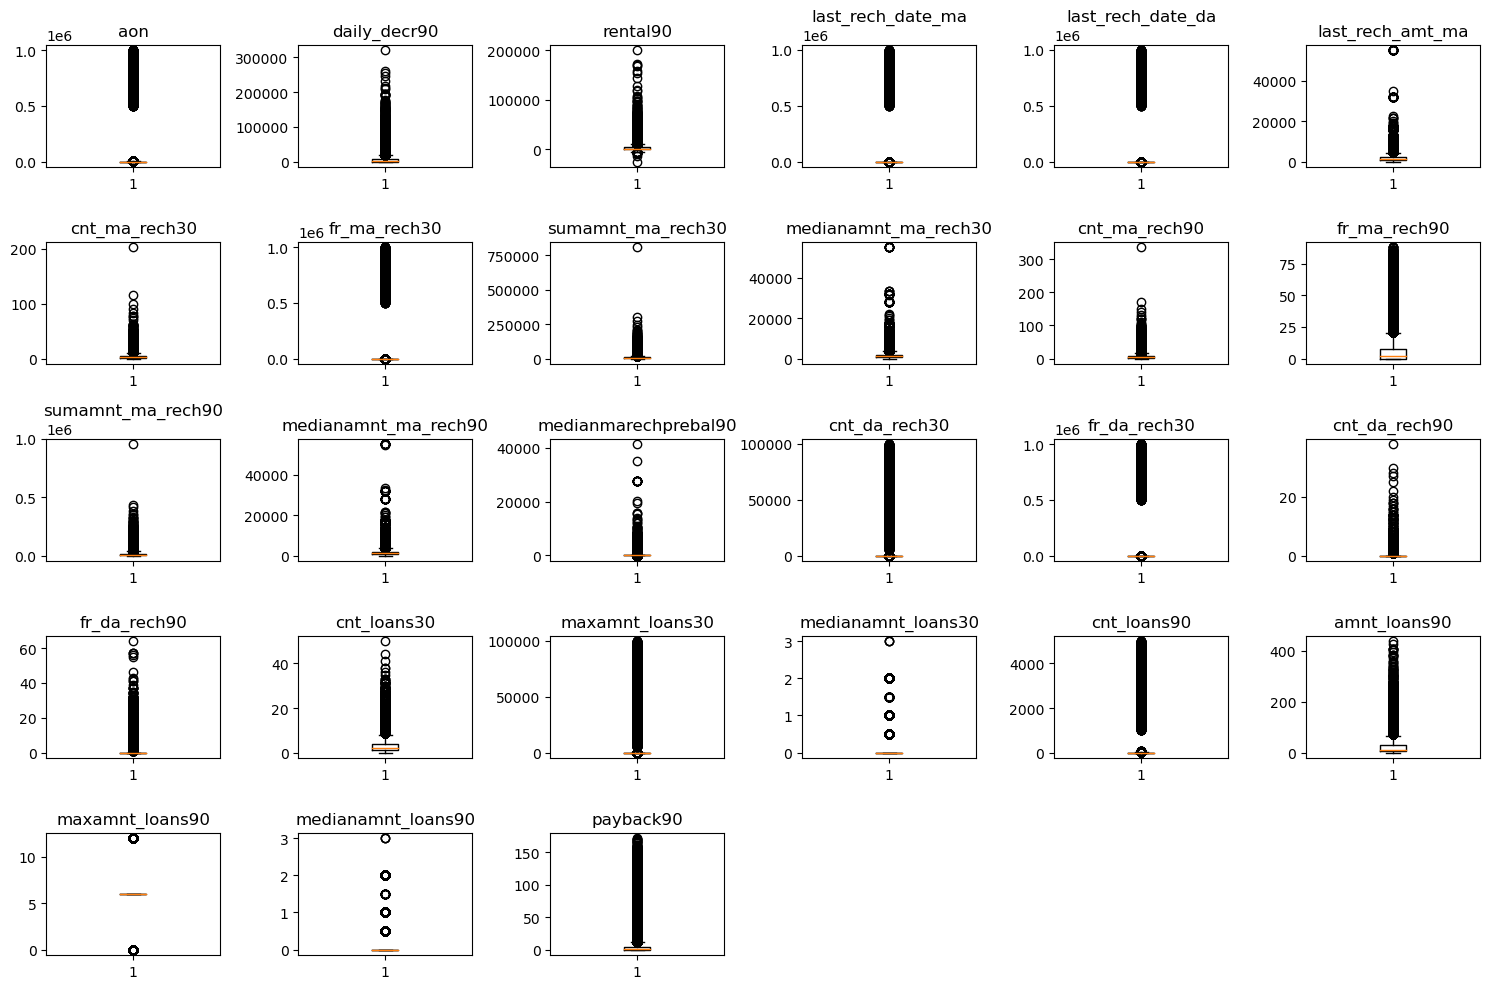

In [16]:

# Create box plots for each column with potential outliers
plt.figure(figsize=(15, 10))
for i, col in enumerate(columns_with_outliers):
    plt.subplot(5, 6, i+1)
    plt.boxplot(dataset[col])
    plt.title(col)
    plt.tight_layout()

plt.show()


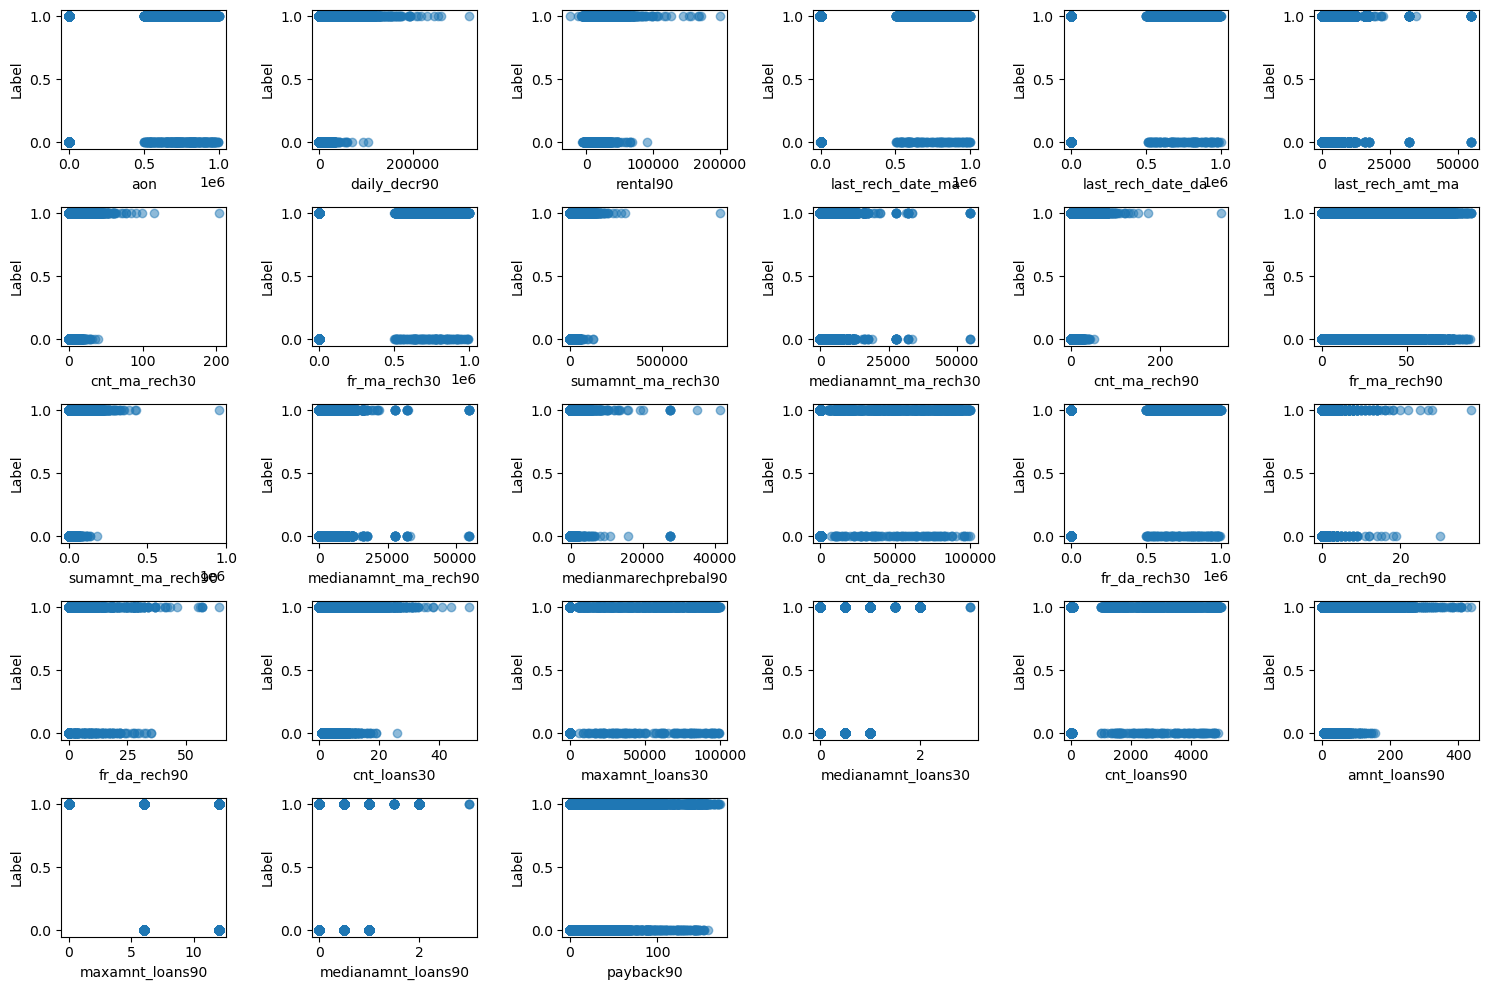

In [17]:
# Create scatter plots for each column with potential outliers against the label column


plt.figure(figsize=(15, 10))
for i, col in enumerate(columns_with_outliers):
    plt.subplot(5, 6, i+1)
    plt.scatter(dataset[col], dataset['label'], alpha=0.5)
    plt.xlabel(col)
    plt.ylabel('Label')
    plt.tight_layout()

plt.show()

#### If we remove all the outliers from our dataset significant portion of datas are lost. (from 209k to around 60k)

#### if we remove all the outliers value with the mean of the respective columns i observed that there is still significant skewness left.

In [18]:
dataset['label'].unique()

array([0, 1], dtype=int64)

### Removing outliers 

In [19]:
def replace_outliers_with_boundaries(data, columns):
    for column in columns:
        Q1 = data[column].quantile(0.25)
        Q3 = data[column].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper= Q3 + 1.5 * IQR
        
        # Replace outliers with the respective boundaries
        data[column] = data[column].apply(lambda x: upper if x > upper
                                          else lower if x < lower else x)

    return data

# Create a list of column names with outliers
columns_with_outliers = ['aon', 'daily_decr90', 'rental90', 'last_rech_date_ma', 'last_rech_date_da',
                         'last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech30', 'sumamnt_ma_rech30',
                         'medianamnt_ma_rech30', 'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90',
                         'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_da_rech30', 'fr_da_rech30',
                         'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30', 'maxamnt_loans30',
                         'medianamnt_loans30', 'cnt_loans90', 'amnt_loans90', 'maxamnt_loans90',
                         'medianamnt_loans90', 'payback90']

dataset = replace_outliers_with_boundaries(dataset, columns_with_outliers)


In [20]:
dataset['label'].unique()

array([0, 1], dtype=int64)

In [21]:
dataset.shape

(209593, 30)

In [22]:
dataset.skew()

label                   -2.270254
aon                      0.947127
daily_decr90             1.238995
rental90                 1.193291
last_rech_date_ma        1.040301
last_rech_date_da        0.000000
last_rech_amt_ma         1.003446
cnt_ma_rech30            0.904157
fr_ma_rech30             1.253282
sumamnt_ma_rech30        1.080771
medianamnt_ma_rech30     0.728219
medianmarechprebal30    14.779875
cnt_ma_rech90            0.934789
fr_ma_rech90             1.172479
sumamnt_ma_rech90        1.126421
medianamnt_ma_rech90     0.763904
medianmarechprebal90     0.957933
cnt_da_rech30            0.000000
fr_da_rech30             0.000000
cnt_da_rech90            0.000000
fr_da_rech90             0.000000
cnt_loans30              1.340348
amnt_loans30             2.975719
maxamnt_loans30          0.000000
medianamnt_loans30       0.000000
cnt_loans90              1.281861
amnt_loans90             1.217940
maxamnt_loans90          0.000000
medianamnt_loans90       0.000000
payback90     

#### After the removal of outliers, there is not much skewness present in the data, aswe can see all the values of skewness are less than 3. There is only 1 value that has skewness more than 10 'medianmarechprebal30' so we  proceed by dropping this attribute

In [23]:
# droping this columns 

dataset.drop(['medianmarechprebal30'],axis=1,inplace=True)

In [24]:
dataset.describe()

,label,aon,daily_decr90,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,...,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback90
count,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.0,209593.000000,209593.000000,209593.000000,209593.000000,...,209593.0,209593.000000,209593.000000,209593.0,209593.0,209593.000000,209593.000000,209593.0,209593.0,209593.000000
mean,0.875177,668.405825,4855.261718,2769.147968,4.837991,0.0,1719.109131,3.683081,3.672041,6861.071877,...,0.0,2.641856,17.952021,6.0,0.0,3.448989,21.423320,6.0,0.0,2.894150
std,0.330519,514.130937,6438.219389,3251.352605,5.071356,0.0,1345.846661,3.199040,4.608388,6612.799020,...,0.0,2.089075,17.379741,0.0,0.0,3.025185,18.506542,0.0,0.0,3.632511
min,0.000000,-48.000000,-93.012667,-5552.035000,-8.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,6.0,0.0,0.000000,0.000000,6.0,0.0,0.000000
25%,1.000000,246.000000,42.692000,300.260000,1.000000,0.0,770.000000,1.000000,0.000000,1540.000000,...,0.0,1.000000,6.000000,6.0,0.0,1.000000,6.000000,6.0,0.0,0.000000
50%,1.000000,527.000000,1500.000000,1334.000000,3.000000,0.0,1539.000000,3.000000,2.000000,4628.000000,...,0.0,2.000000,12.000000,6.0,0.0,2.000000,12.000000,6.0,0.0,1.666667
75%,1.000000,982.000000,7802.790000,4201.790000,7.000000,0.0,2309.000000,5.000000,6.000000,10010.000000,...,0.0,4.000000,24.000000,6.0,0.0,5.000000,30.000000,6.0,0.0,4.500000
max,1.000000,2086.000000,19442.937000,10054.085000,16.000000,0.0,4617.500000,11.000000,15.000000,22715.000000,...,0.0,8.500000,306.000000,6.0,0.0,11.000000,66.000000,6.0,0.0,11.250000


In [25]:
dataset['label'].value_counts()

1    183431
0     26162
Name: label, dtype: int64

In [26]:

correlations = dataset.corr()['label'].sort_values(ascending=False)

# Print the correlation values
print(correlations)


label                   1.000000
cnt_ma_rech90           0.291153
cnt_ma_rech30           0.283997
sumamnt_ma_rech90       0.272129
sumamnt_ma_rech30       0.268710
amnt_loans90            0.242269
cnt_loans90             0.231642
cnt_loans30             0.220750
daily_decr90            0.212596
medianamnt_ma_rech30    0.208705
amnt_loans30            0.197272
medianamnt_ma_rech90    0.183003
last_rech_amt_ma        0.180538
medianmarechprebal90    0.179675
payback90               0.158440
fr_ma_rech30            0.157933
fr_ma_rech90            0.123740
rental90                0.091473
aon                     0.074837
last_rech_date_ma      -0.051773
last_rech_date_da            NaN
cnt_da_rech30                NaN
fr_da_rech30                 NaN
cnt_da_rech90                NaN
fr_da_rech90                 NaN
maxamnt_loans30              NaN
medianamnt_loans30           NaN
maxamnt_loans90              NaN
medianamnt_loans90           NaN
Name: label, dtype: float64


#### Droping features that have no or almost least significance 

In [27]:
dataset.drop(['last_rech_date_da','cnt_da_rech30','cnt_da_rech90','fr_da_rech90',
             'maxamnt_loans30','medianamnt_loans30','maxamnt_loans90','medianamnt_loans90'],           
             axis=1,inplace=True)

In [28]:
dataset.columns

Index(['label', 'aon', 'daily_decr90', 'rental90', 'last_rech_date_ma',
       'last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech30',
       'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'cnt_ma_rech90',
       'fr_ma_rech90', 'sumamnt_ma_rech90', 'medianamnt_ma_rech90',
       'medianmarechprebal90', 'fr_da_rech30', 'cnt_loans30', 'amnt_loans30',
       'cnt_loans90', 'amnt_loans90', 'payback90'],
      dtype='object')

In [29]:
dataset.shape

(209593, 21)

#### We are resampling the data into X_resampled and y_resampled, but it does not modify the original dataset dataset. The resampled data is stored in X_resampled and y_resampled, not in the original dataset.

In [30]:
from imblearn.over_sampling import RandomOverSampler

# Separating  features and target variable
X = dataset.drop('label', axis=1)
y = dataset['label']

# Create the RandomOverSampler object
oversampler = RandomOverSampler(random_state=42)

# Resample the dataset
X_resampled, y_resampled = oversampler.fit_resample(X, y)

# Now, X_resampled and y_resampled will have balanced classes
# Creating  a new balanced DataFrame 
balanced_dataset = pd.concat([X_resampled, y_resampled], axis=1)


In [31]:
dataset['label'].value_counts()

1    183431
0     26162
Name: label, dtype: int64

In [32]:
y_resampled.value_counts()

0    183431
1    183431
Name: label, dtype: int64

### Applying standarization 

In [33]:
from sklearn.preprocessing import StandardScaler

scalar=StandardScaler()
X_scalar=scalar.fit_transform(X_resampled)

### Spliting data into training and testing

In [34]:
from sklearn.model_selection import train_test_split

x_train , x_test , y_train , y_test = train_test_split(X_scalar ,y_resampled , test_size = 0.2)

### Logistic Regression

In [35]:
# since it is a classification prob we should use Logistic Regression

from sklearn.linear_model import LogisticRegression

# max iteration is set to 1000 because optimization algo(LBFGS) within Logistic Reg
# is not converging and it shows a warning 
lr= LogisticRegression(max_iter=1000) 

lr.fit(x_train,y_train)

LogisticRegression(max_iter=1000)

In [36]:
y_pred=lr.predict(x_test)

from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

print("Classification analysis\n")
print(classification_report(y_pred,y_test))

print("Confusion Matrix\n")
print(confusion_matrix(y_pred,y_test))

print("Accuracy of the model\n")
print(accuracy_score(y_pred,y_test).round(5))

Classification analysis

              precision    recall  f1-score   support

           0       0.79      0.75      0.77     38701
           1       0.74      0.78      0.76     34672

    accuracy                           0.77     73373
   macro avg       0.77      0.77      0.77     73373
weighted avg       0.77      0.77      0.77     73373

Confusion Matrix

[[29169  9532]
 [ 7527 27145]]
Accuracy of the model

0.7675


### KNN

In [37]:
from sklearn.neighbors import KNeighborsClassifier

kn=KNeighborsClassifier(weights='distance')

kn.fit(x_train,y_train)

KNeighborsClassifier(weights='distance')

In [38]:
y_pred=kn.predict(x_test)

from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

print("Classification analysis\n")
print(classification_report(y_pred,y_test))

print("Confusion Matrix\n")
print(confusion_matrix(y_pred,y_test))

print("Accuracy of the model\n")
print(accuracy_score(y_pred,y_test).round(5))

Classification analysis

              precision    recall  f1-score   support

           0       1.00      0.82      0.90     44759
           1       0.78      1.00      0.88     28614

    accuracy                           0.89     73373
   macro avg       0.89      0.91      0.89     73373
weighted avg       0.91      0.89      0.89     73373

Confusion Matrix

[[36656  8103]
 [   40 28574]]
Accuracy of the model

0.88902


### Decision Tree

In [39]:
from sklearn.tree import DecisionTreeClassifier

# there are 2 criterion entropy and gini. (check one by one )
dc=DecisionTreeClassifier(criterion='entropy',random_state=1)

dc.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=1)

In [40]:
 y_pred=dc.predict(x_test)

from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

print("Classification analysis\n")
print(classification_report(y_pred,y_test))

print("Confusion Matrix\n")
print(confusion_matrix(y_pred,y_test))

print("Accuracy of the model\n")
print(accuracy_score(y_pred,y_test).round(5))

Classification analysis

              precision    recall  f1-score   support

           0       1.00      0.92      0.96     39976
           1       0.91      1.00      0.95     33397

    accuracy                           0.95     73373
   macro avg       0.95      0.96      0.95     73373
weighted avg       0.96      0.95      0.95     73373

Confusion Matrix

[[36641  3335]
 [   55 33342]]
Accuracy of the model

0.9538


### Random Forest

In [41]:
# n_estimator means no of decision trees, By default it  is 100
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=20, criterion='entropy',random_state=1)

rf.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=20, random_state=1)

In [42]:
y_pred=rf.predict(x_test)

from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

print("Classification analysis\n")
print(classification_report(y_pred,y_test))

print("Confusion Matrix\n")
print(confusion_matrix(y_pred,y_test))

print("Accuracy of the model\n")
print(accuracy_score(y_pred,y_test).round(5))

Classification analysis

              precision    recall  f1-score   support

           0       1.00      0.95      0.97     38526
           1       0.95      1.00      0.97     34847

    accuracy                           0.97     73373
   macro avg       0.97      0.97      0.97     73373
weighted avg       0.97      0.97      0.97     73373

Confusion Matrix

[[36638  1888]
 [   58 34789]]
Accuracy of the model

0.97348


### XGB Classifier

In [43]:
import xgboost as xgb

# Create the XGBoost Classifier
xgb_classifier = xgb.XGBClassifier(random_state=1)

# Fit the model on the training data
xgb_classifier.fit(x_train, y_train)



XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=1, ...)

In [44]:
# Make predictions on the test data
y_pred = xgb_classifier.predict(x_test)

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("Classification Analysis\n")
print(classification_report(y_pred, y_test))

print("Confusion Matrix\n")
print(confusion_matrix(y_pred, y_test))

print("Accuracy of the model\n")
print(accuracy_score(y_pred, y_test).round(5))


Classification Analysis

              precision    recall  f1-score   support

           0       0.86      0.85      0.85     37308
           1       0.84      0.86      0.85     36065

    accuracy                           0.85     73373
   macro avg       0.85      0.85      0.85     73373
weighted avg       0.85      0.85      0.85     73373

Confusion Matrix

[[31566  5742]
 [ 5130 30935]]
Accuracy of the model

0.85183


####  Conclusion: Out of all the machine learning models  Random Forest algorothym gives the best result with an accuracy of 97.3% in detecting customers who are  probable defaultor for loan payment 